## Data Loading Script

This script loads and preprocesses three key datasets used in demographic analysis:

### 1. Load Total Population Dataset
```python
import pandas as pd

# Load population dataset (skip the first 4 metadata rows)
df_pop = pd.read_csv('API_SP.POP.TOTL_DS.csv', skiprows=4)


In [22]:
import pandas as pd

# Load population dataset (remove header rows manually or with skiprows)
df_pop = pd.read_csv('API_SP.POP.TOTL_DS.csv', skiprows=4)  # Assuming first 4 rows are metadata

# Load country metadata
df_meta_country = pd.read_csv('Meta_country.csv')

# Load indicator metadata
df_meta_indicator = pd.read_csv('Metadata_Indicator.csv')


## Quick Peek at Our Data

A few fast checks to make sure everything's loading properly:

```python
print(df_pop.shape)                  # Dimensions of population data
print(df_pop.columns[:10])          # Preview first few column names
df_pop.head()                       # See first 5 rows of population
df_meta_country.head()              # Glimpse into country metadata
df_meta_indicator.head()            # Peek into indicator metadata


In [23]:
print(df_pop.shape)
print(df_pop.columns[:10])  # First few columns

df_pop.head()  # Check rows
df_meta_country.head()
df_meta_indicator.head()


(266, 70)
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965'],
      dtype='object')


,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,SP.POP.TOTL,"Population, total",Total population is based on the de facto defi...,"World Population Prospects, United Nations (UN...",NaN


## Reshape & Clean Population Data

Converting wide-format data into something more usable:




In [24]:
# Melt population data to long format
df_long = df_pop.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                      var_name='Year', value_name='Population')

# Convert year to numeric and drop NaNs
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')
df_long.dropna(subset=['Population'], inplace=True)
df_long['Population'] = df_long['Population'].astype(float)


In [25]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17195 entries, 0 to 17289
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    17195 non-null  object 
 1   Country Code    17195 non-null  object 
 2   Indicator Name  17195 non-null  object 
 3   Indicator Code  17195 non-null  object 
 4   Year            17195 non-null  float64
 5   Population      17195 non-null  float64
dtypes: float64(2), object(4)
memory usage: 940.4+ KB


## Global Population Over Time

This visualization illustrates how the total global population has evolved annually across the dataset. The trendline reveals a consistent upward trajectory, reflecting growth in most regions over time.

- **Insight:** The global population shows steady increases, with notable acceleration in recent decades.
- **Time Range:** Covers all years included in the dataset, enabling temporal comparisons.
- **Design Notes:** A dark green line emphasizes the growth pattern, supported by gridlines and clear axis labels.

Great starting point for exploring regional contributions or correlating growth with socio-economic indicators.


C:\Users\A\AppData\Local\Temp\ipykernel_10236\731655656.py:15: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  plt.tight_layout()
C:\Users\A\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


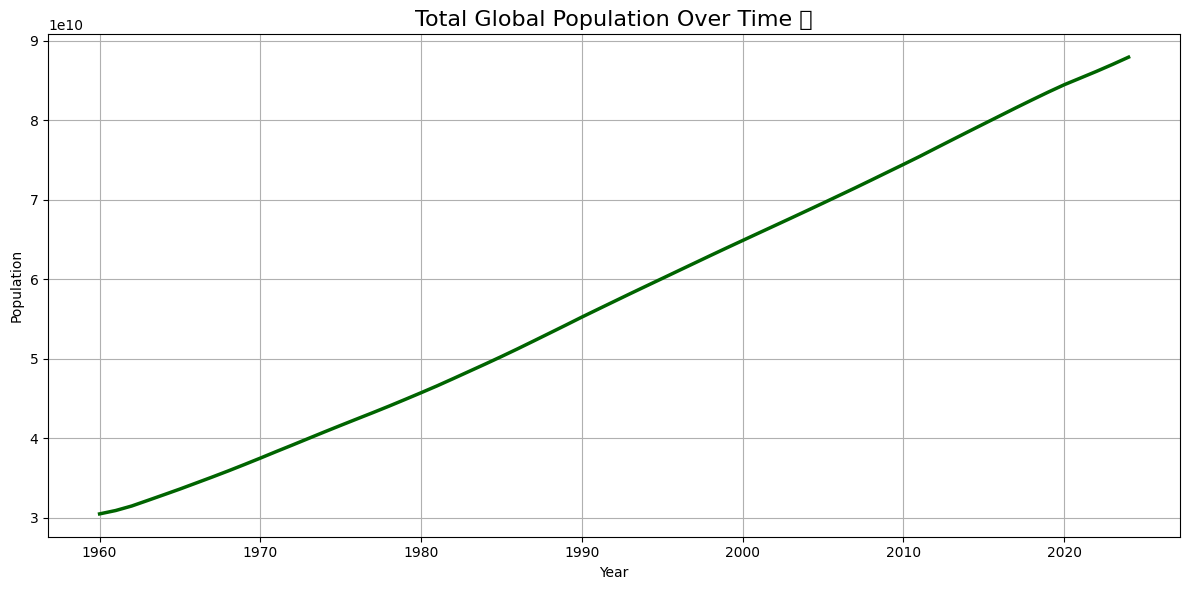

In [26]:
#Global Population Over Time

import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate by year
pop_by_year = df_long.groupby('Year')['Population'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=pop_by_year, x='Year', y='Population', linewidth=2.5, color='darkgreen')
plt.title('Total Global Population Over Time 🌍', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()


## Top 10 Most Populous Countries in the Latest Year

A horizontal bar chart showcases the global giants in terms of population for the most recent year in the dataset.

- **Global Snapshot:** Highlights the dominant contributors to world population.
- **Data Basis:** Based on cleaned and aggregated values from the reshaped dataset.
- **Design Touch:** Uses a Viridis color palette for clear, aesthetic comparison.

Ideal for spotlighting regional density and setting the stage for deeper analysis into growth trends and demographics.


C:\Users\A\AppData\Local\Temp\ipykernel_10236\1718426171.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='Population', y='Country Name', palette='viridis')


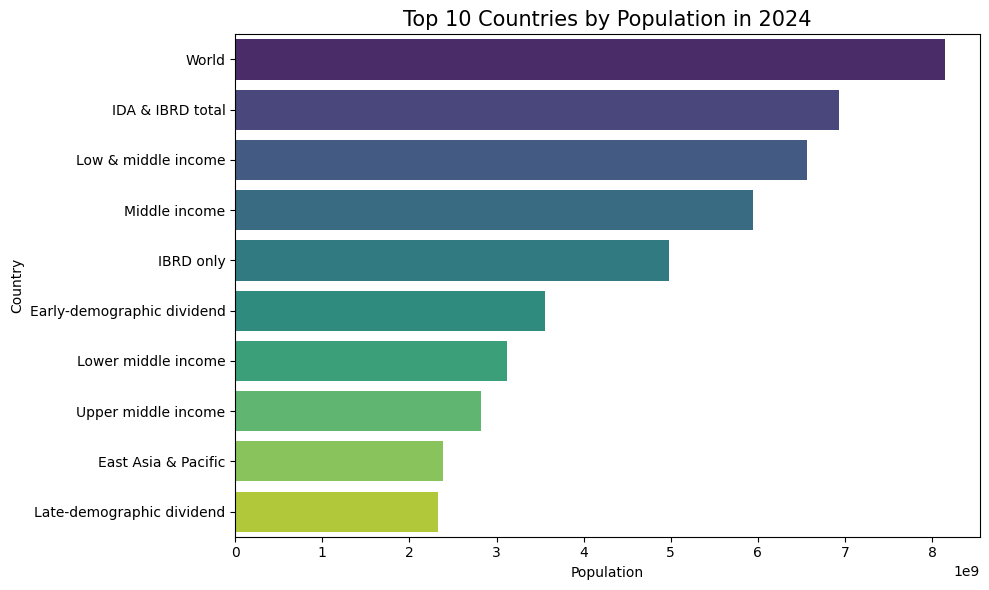

In [27]:
#Top 10 Most Populous Countries in Latest Year

latest_year = int(df_long['Year'].max())
top_countries = df_long[df_long['Year'] == latest_year].sort_values(by='Population', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, x='Population', y='Country Name', palette='viridis')
plt.title(f'Top 10 Countries by Population in {latest_year}', fontsize=15)
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## India’s Population Forecast (2026–2040)

This chart combines historical data with a basic linear regression forecast to project India’s population growth over the next 15 years.

- **Historical Trend:** Shows steady year-on-year increase based on past data.
- **Forecast:** Dashed red line predicts future growth using a simple machine learning model.
- **Why It Matters:** Offers a data-driven glimpse into demographic momentum—ideal for planning, policy, and comparative analysis.

A great starting point before experimenting with more complex models or multi-country forecasting.


c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


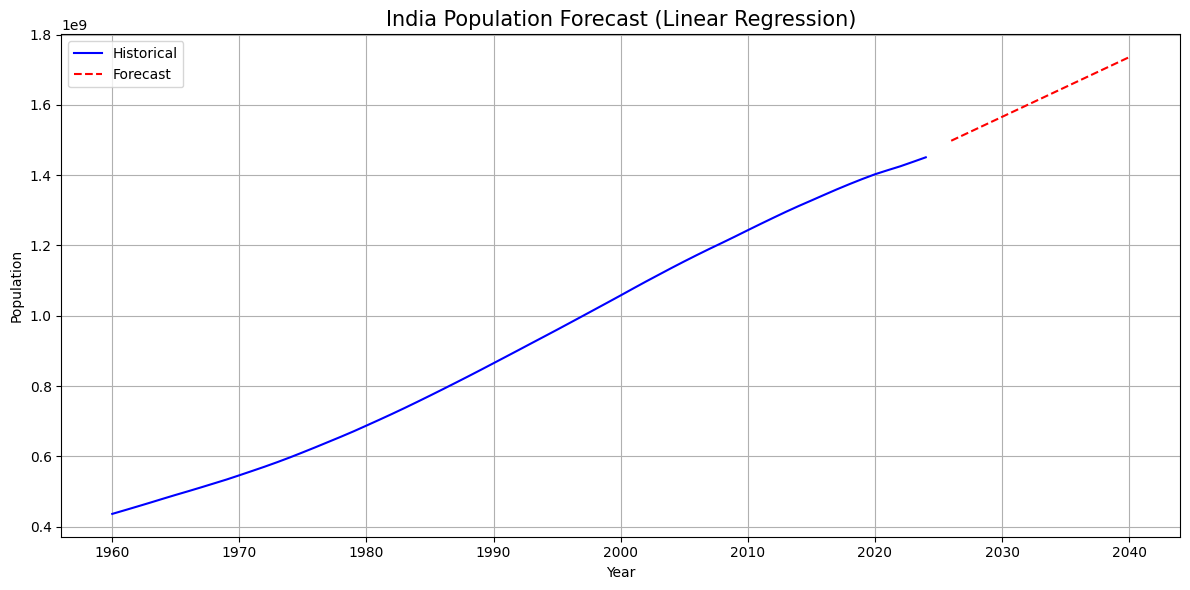

In [28]:
#Linear Regression Forecast (Basic ML Trend)

from sklearn.linear_model import LinearRegression
import numpy as np

# Example: India’s population trend
india_data = df_long[df_long['Country Name'] == 'India'].dropna()
X = india_data[['Year']]
y = india_data['Population']

model = LinearRegression().fit(X, y)
future_years = np.array(range(2026, 2041)).reshape(-1, 1)
preds = model.predict(future_years)

# Plot historical vs predicted
plt.figure(figsize=(12, 6))
plt.plot(india_data['Year'], india_data['Population'], label='Historical', color='blue')
plt.plot(future_years.flatten(), preds, label='Forecast', linestyle='dashed', color='red')
plt.title('India Population Forecast (Linear Regression)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Clustering Countries by Population Scale

This scatterplot visualizes how countries group together based on population size, using a logarithmic transformation and KMeans clustering.

- **Methodology:** Countries were segmented into 4 distinct clusters by scale, enhancing contrast between populous and sparsely populated nations.
- **Log Transformation:** Ensures better distribution handling and minimizes skewness in large-scale population data.
- **Visuals:** Each cluster is color-coded for clarity, offering quick insights into global population tiers.

Great for identifying population patterns and setting up deeper socio-economic correlation analysis.


c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


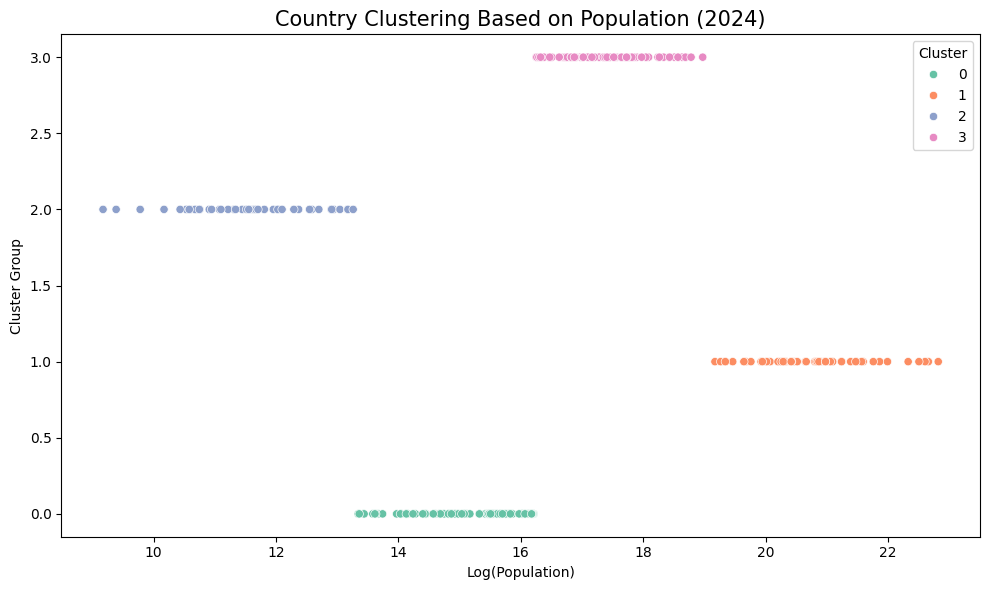

In [29]:
#Clustering Countries by Population Scale

from sklearn.cluster import KMeans

latest_pop = df_long[df_long['Year'] == latest_year][['Country Name', 'Population']].copy()
latest_pop['LogPop'] = np.log1p(latest_pop['Population'])

# Cluster into 4 groups
kmeans = KMeans(n_clusters=4, random_state=42)
latest_pop['Cluster'] = kmeans.fit_predict(latest_pop[['LogPop']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=latest_pop, x='LogPop', y='Cluster', hue='Cluster', palette='Set2')
plt.title(f'Country Clustering Based on Population ({latest_year})', fontsize=15)
plt.xlabel('Log(Population)')
plt.ylabel('Cluster Group')
plt.tight_layout()
plt.show()


## Forecasting Future Populations for the World's Most Populous Nations

Using basic linear regression, this visualization projects the population trajectories of the top 5 most populous countries through 2040.

- **Countries Covered:** Automatically selected based on population size in the latest dataset year.
- **Historical vs Forecasted:** Each country’s historical data is shown in blue, while projected values through 2040 appear in dashed red.
- **Approach:** Individual regression models per country to preserve trend accuracy.
- **Use Case:** Useful for comparative forecasting, urban planning, or global policy simulations.

Perfect launchpad for exploring growth dynamics or incorporating more advanced predictive techniques.


c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


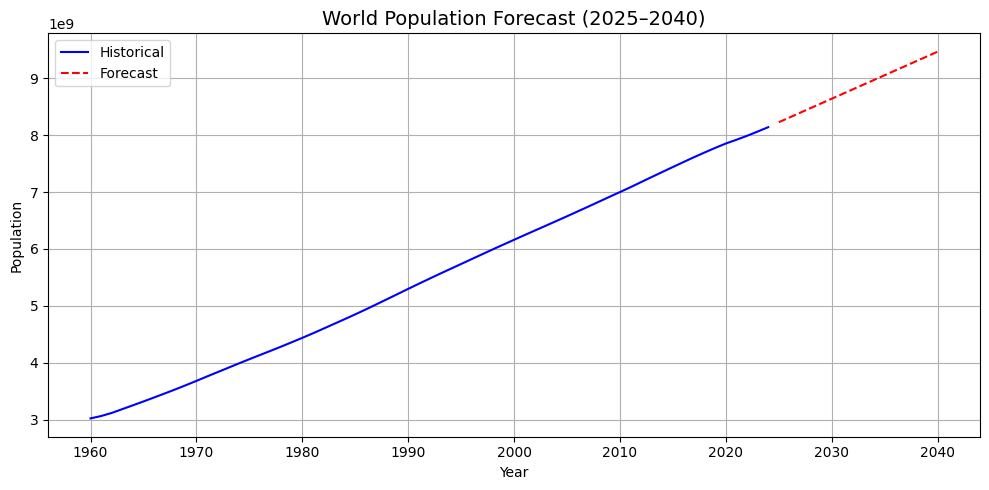

c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


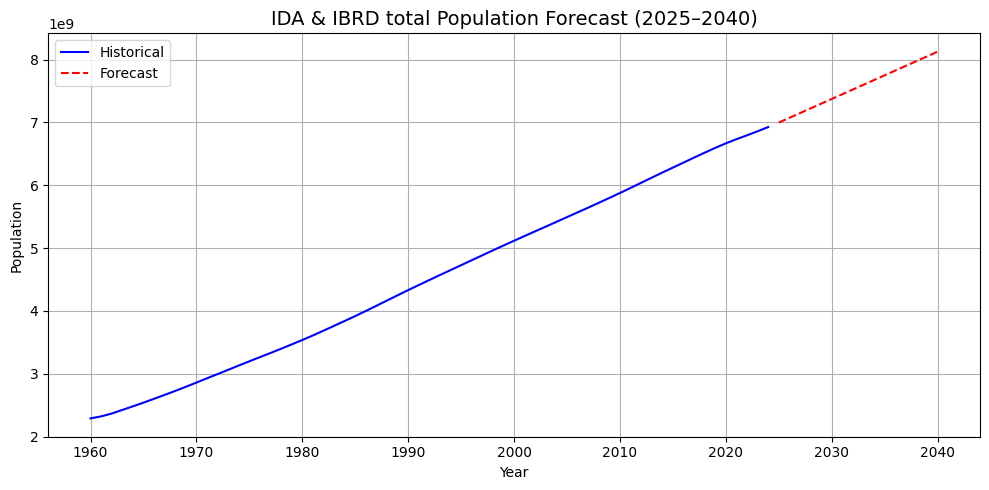

c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


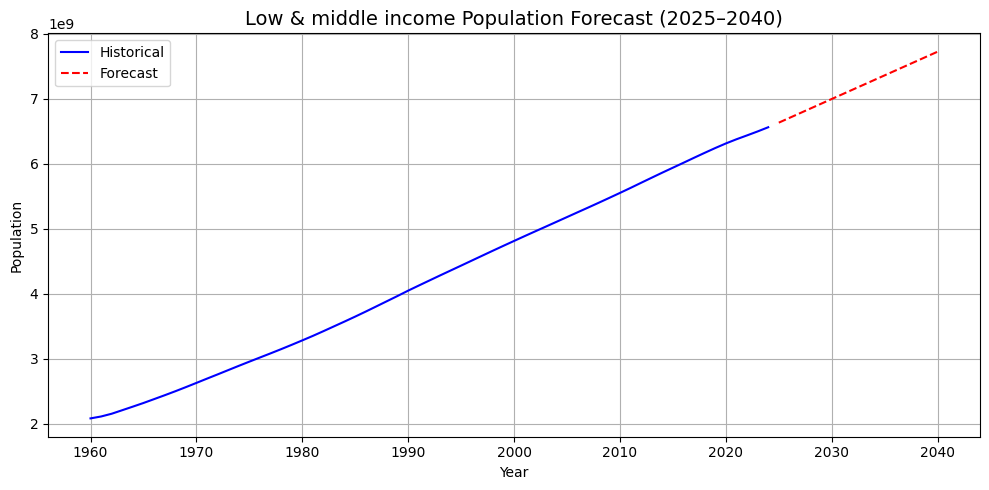

c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


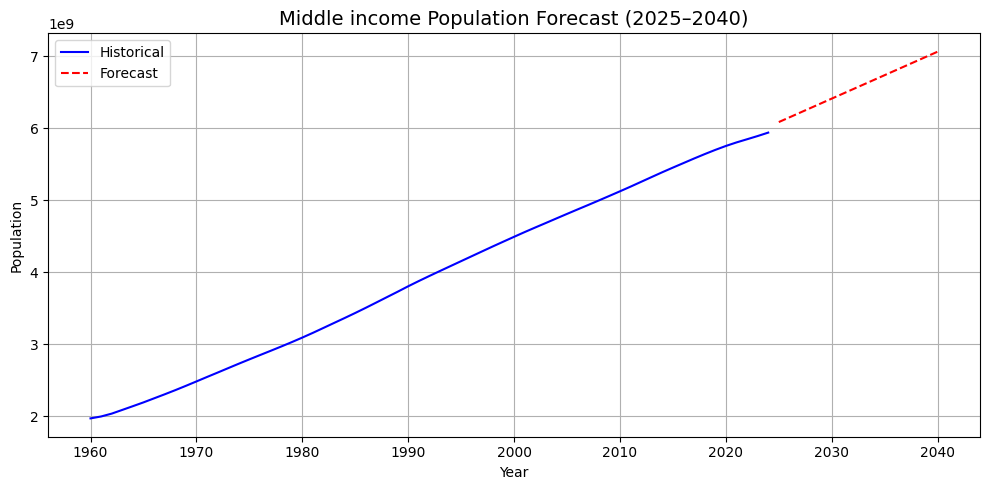

c:\Users\A\ANACONDA3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


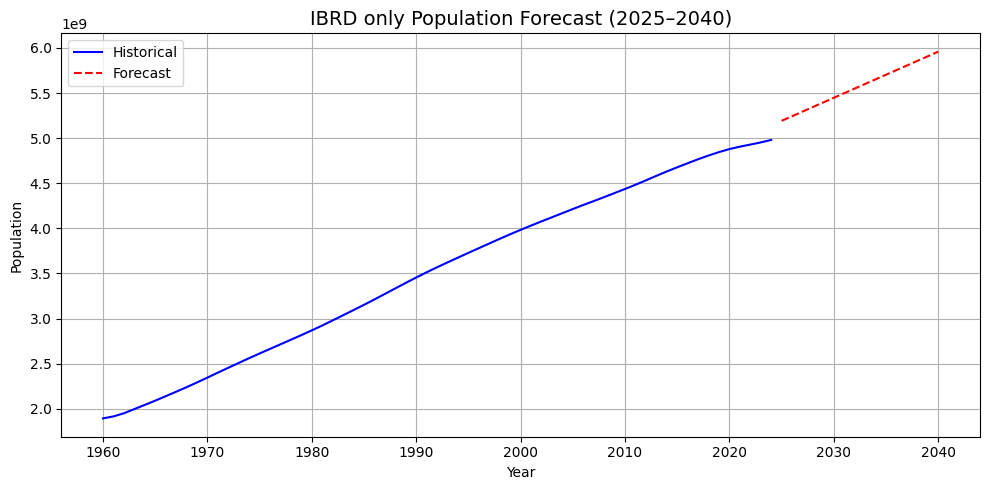

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Prepare future years array
future_years = np.array(range(2025, 2041)).reshape(-1, 1)

# Get top 5 countries in latest year
latest_year = int(df_long['Year'].max())
top_countries = df_long[df_long['Year'] == latest_year].nlargest(5, 'Population')['Country Name'].tolist()

# Loop through each country
for country in top_countries:
    temp = df_long[df_long['Country Name'] == country]
    X_temp = temp[['Year']]
    y_temp = temp['Population']

    model_temp = LinearRegression().fit(X_temp, y_temp)
    preds_temp = model_temp.predict(future_years)

    # Plot forecast
    plt.figure(figsize=(10, 5))
    plt.plot(X_temp, y_temp, label='Historical', color='blue')
    plt.plot(future_years.flatten(), preds_temp, label='Forecast', linestyle='--', color='red')
    plt.title(f'{country} Population Forecast (2025–2040)', fontsize=14)
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



## WorldGraphIQ: A Data-Driven Exploration of Global Demographics

**WorldGraphIQ** is a suite of interactive notebooks designed to unravel global population dynamics through statistical modeling and visual storytelling. It transforms raw demographic data into actionable insights using Python, Seaborn, Folium, and machine learning techniques.

### Key Highlights
- **Population Trends:** Tracks global growth over time using clean, reshaped datasets.
- **Top Countries Analysis:** Highlights population giants and compares their demographic weight.
- **Forecasting Models:** Projects future populations with linear regression for policy and planning insights.
- **Clustering & Segmentation:** Groups countries by population scale to reveal tiers of global density.

### Goals
- Uncover patterns hidden in demographic distributions.
- Enable informed decision-making through visual analytics.
- Set the foundation for deeper socio-economic correlations.

### Built With
Python · Pandas · Matplotlib · Seaborn · Scikit-learn · Folium

A compelling blend of data science and storytelling, WorldGraphIQ bridges statistics with social insight—perfect for academic showcase, professional portfolio, or public policy exploration.
